In [20]:
import os
os.chdir("C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python310\\Scripts\\image_processing_UCCC2513")

# SET UP

In [2]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Activity 1

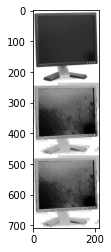

In [5]:
img = cv.imread('monitor.jfif', 0)

# first histogram equalization operation
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img1 = cdf[img]

# second histogram equalization operation
hist, bins = np.histogram(img1.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img1]

combine = np.concatenate((img,img1,img2))

plt.imshow(cv.cvtColor(combine, cv.COLOR_GRAY2RGB))
cv.imshow("Monitor", combine)
cv.waitKey(0)
cv.destroyAllWindows()

no differences

# Exercise 2

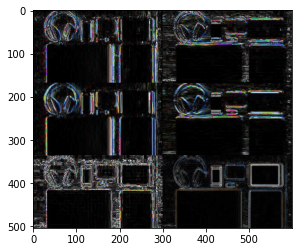

In [8]:
img = cv.imread('electronic.jfif')
blur = cv.GaussianBlur(img, (5, 5), 0)
kernel  =  3

# sobel x and y of the image
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = kernel)
sobelx_8u = np.uint8(np.absolute(sobelx))
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = kernel)
sobely_8u = np.uint8(np.absolute(sobely))
sobel1 = np.concatenate((sobelx_8u, sobely_8u), axis = 1)

# sobel x and y of the image after gaussian blur
sobelx = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize = kernel)
sobelx_8u = np.uint8(np.absolute(sobelx))
sobely = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize = kernel)
sobely_8u = np.uint8(np.absolute(sobely))
sobel2 = np.concatenate((sobelx_8u, sobely_8u), axis = 1)

# laplacian of image
laplacian = cv.Laplacian(img, cv.CV_64F, ksize = kernel)
laplacian_8u_1 = np.uint8(np.absolute(laplacian))

# laplacian of the image after gaussian blur
laplacian = cv.Laplacian(blur, cv.CV_64F, ksize = kernel)
laplacian_8u_2 = np.uint8(np.absolute(laplacian))

laplacian = np.concatenate((laplacian_8u_1, laplacian_8u_2), axis = 1)

combine_result = np.concatenate((sobel1, sobel2, laplacian), axis = 0)

plt.imshow(combine)
cv.imshow("Result", combine_result)
cv.waitKey(0)
cv.destroyAllWindows()

Using Sobel operator with Gaussian blurring is optimal because the noise from the image shown above is reduced and the edge is more obvious.

# Acitivity 3

In [16]:
img = cv.imread('pineapple.jfif')
img = cv.GaussianBlur(img, (3, 3), 0)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Laplacian
laplacian_method = cv.Laplacian(img_gray.copy(), cv.CV_64F, ksize = 3)
laplacian_8u = np.uint8(np.absolute(laplacian_method))

# Canny
canny_method = cv.Canny(img, 50, 100)
result1 = np.concatenate((img_gray, laplacian_8u, canny_method), axis = 1)

# Sobel x and y of the image
sobelx = cv.Sobel(img_gray.copy(), cv.CV_64F, 1, 0, ksize = 3)
sobelx_8u = np.uint8(np.absolute(sobelx))
sobely = cv.Sobel(img_gray.copy(), cv.CV_64F, 0, 1, ksize = 3)
sobely_8u = np.uint8(np.absolute(sobely))
sobel_8u = sobelx_8u + sobely_8u
result2 = np.concatenate((sobelx_8u, sobely_8u, sobel_8u), axis = 1)

# Prewitt
kernelx = np.array([[3,3,3],[0,0,0],[-3,-3,-3]])
kernely = np.array([[-3,0,3],[-3,0,3],[-3,0,3]])
x = cv.filter2D(img_gray.copy(), -1, kernelx)
y = cv.filter2D(img_gray.copy(), -1, kernely)
xy = prewittx + prewitty
result3 = np.concatenate((x, y, xy), axis = 1)

# Scharr
scharrx = cv.Scharr(img_gray.copy(), cv.CV_32F, 1, 0)
scharry = cv.Scharr(img_gray.copy(), cv.CV_32F, 0, 1)
scharr = scharrx + scharry
result4 = np.concatenate((scharrx, scharry, scharr), axis = 1)

cv.imshow("Laplacian and Canny", result1)
cv.imshow("Sobels", result2)
cv.imshow("Prewitts", result3)
cv.imshow("Scharrs", result4)
cv.waitKey(0)
cv.destroyAllWindows()

Laplacian --> edges generated are thin, accurate but can not see the image cleary.


Canny edge detection --> edges generated are thin, accurate, sharo and clear


Sobel --> edges generated have thicker than laplacian and canny edge, accurate but blurry


Prewitt --> edges generated have medium thickness and not that accurate


Scarr --> the edges are sharp, clear but too bulky

# Activity 4

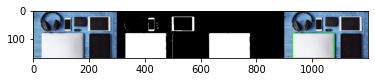

In [19]:
img = cv.imread('electronic.jfif')

img_mask = cv.inRange(img, (160,160,160), (255,255,255))

contours, hierarchy = cv.findContours(img_mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cnt_list = np.zeros(len(contours))
for i in range(0,len(contours)):
    cnt_list[i] = cv.contourArea(contours[i])
    
#pc is the largest component
largest_contour_index = np.argmax(cnt_list)
largest_contour = contours[largest_contour_index]
contour_mask = np.zeros(img.shape, dtype = np.uint8)
if len(contours) != 0:
    cv.drawContours(contour_mask, contours, largest_contour_index, (255,255,255), -1)

bounding_box = img.copy()
x,y,w,h = cv.boundingRect(largest_contour)
cv.rectangle(bounding_box,(x,y),(x+w,y+h),(0,255,0),2)

img_mask = np.stack((img_mask,)*3, axis=-1)
combine_result = np.concatenate((img, img_mask, contour_mask, bounding_box), axis = 1)

plt.imshow(combine)
cv.imshow("PC white area result", combine_result)
cv.waitKey(0)
cv.destroyAllWindows()